# TensorFlow basic ML

## 1- Simple Neural Network Example

We import tensorflow, numpy and pyplot

In [58]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

We create a number of features variable and number of neurons

In [5]:
n_features = 10
n_dense_neurons = 3

First of all, we need to define our graph. Which is defined by the function: z = Wx + b

"W" is corresponded with the Model and "b" with the inizialitation

We create the placeholder x, which is simply a variable where we will assign our data

In this case, we create a placeholder of float32 numbers and the shape of (?,10)

In [6]:
x = tf.placeholder(tf.float32,(None,n_features))

Then we create the W variable, which contains random numbers with the shape of (10,3)

Also, we create the b variable, which contains a vector of 3 ones

That is because whe have to multiply "x * W" and then add "b"

In [7]:
W = tf.Variable(tf.random_normal([n_features,n_dense_neurons]))

b = tf.Variable(tf.ones([n_dense_neurons]))

We make a matrix multiplication of x (?,10) * (10,3) = (?,3)

After that, we add the result of that multiplication (?,3) + (3) = (?,3)

In [11]:
xW = tf.matmul(x,W)

z = tf.add(xW,b)

After we have our graph, we have to pass an activation function. For example, the sigmoid function.

With that activation function, we can set up weights to our data.

In [12]:
a = tf.sigmoid(z)

We have to initialize our variables with the following function

In [13]:
init = tf.global_variables_initializer()

In order to execute, we have to use tf.Session()

To get the layer out result, we pass our graph and a feed dictionary of data, which in this case is a matrix filled with random numbers and the shape of (1,3)

In [14]:
with tf.Session() as sess:
    
    sess.run(init)
    
    layer_out = sess.run(a,feed_dict={x:np.random.random([1,n_features])})

We print our layer_out, which is simply a matrix of (1,3) with data between 0 and 1

In [15]:
print(layer_out)

[[ 0.99447775  0.07993955  0.70858473]]


But we are not doing nothing with this data!

This isn't a real neural network, because a real neural network would go back to adjust "W" or "b" based on some sort of cost function

So we need a cost function and some kind of optimizer in order to adjust or variables

## 2- Simple Regression Example

We set our placeholder again, but this time it will be 10 linearly space points and we will add some noise to them

We will make the x_data and the y_label with some noise in order to plot the data in a 2D graph and we plot the data

In [18]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
print(x_data)

[-0.7120721   0.74622755  0.74064824  4.16540136  3.91469236  4.09736163
  7.22614295  6.61655899  9.78275007  8.68402562]


In [19]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
print(y_label)

[-0.27016798  0.88889318  3.59825057  2.18921018  4.92007896  6.2003449
  5.48810065  7.87224096  8.18970913  8.62920037]


We will make our data ploted and we see althrough there is some noise, there is still visible the linear trend in our data

We will add a red line in order to make this more noticiable

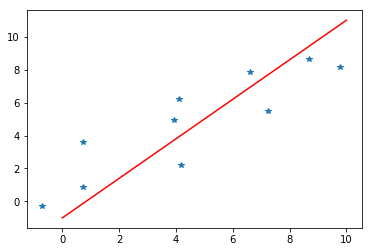

In [49]:
x_line = np.linspace(0,10,10)
y_line = np.linspace(-1,11,10)

plt.plot(x_data,y_label,'*')
plt.plot(x_line,y_line,'red')

Now we are going to create our neural network.

So we need to create our graph: y = mx + b, and we will choose two random values for "m" and "b"

It is up to the neural network to fix the values of that variables and create more fancier trend

In [26]:
np.random.rand(2)

array([ 0.03094451,  0.74810186])

In [27]:
m = tf.Variable(0.03)
b = tf.Variable(0.74)

Now, we need to calculate our error

In order to to that we first calculate our "y_hat" which is the predicted value of "y" given "m" and "b" as variables and "x" as placeholder, and then we calculate the error the following way

We add to the error, the actual value minus the predicted value, and we square it in order to punish higher error

In [28]:
error = 0

for x,y in zip(x_data,y_label):

    y_hat = m*x + b
    
    error += (y-y_hat)**2

After that, we need to create our optimizer, which will figure out how to reduce that error or cost. We will use a gradient descent optimizer for this example

The learning rate defines how fast it will descend

If we define a small learning rate, it will be more precise but slightly slower

If we define a high learning rate, it will be very fast but not very precise

In [29]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

Now we have to tell to our optimizer what it needs to optimize, in our example we want to minimize the error

In [30]:
train = optimizer.minimize(error)

Now we have to initialize our variables and run our neural network

We also have to decide how many steps we need to run in our neural network, less steps means less precision

Then, we need to get our values of "m" and "b" from our session

In [31]:
init = tf.global_variables_initializer()

In [54]:
with tf.Session() as sess:
    
    sess.run(init)
    
    training_steps = 100
    
    for i in range(training_steps):
        sess.run(train)
        
    final_slop , final_intercept = sess.run([m,b])

Now, we choose some data as "x" and we define our y predicted plot as our m*x + b

In [55]:
x_test = np.linspace(-1,11,10)

y_pred_plot = final_slop*x_test + final_intercept

We plot the results and compare it with our data to see if the line is more or less accurate with the trend of our data

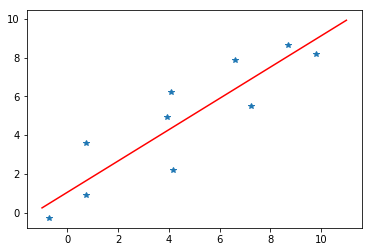

In [56]:
plt.plot(x_test,y_pred_plot,'red')
plt.plot(x_data,y_label,'*')

Here we can see the result!

## 3- More Realistic Regression Example

We import also pandas

In [57]:
import pandas as pd

This time we will use a huge dataset and we add to it some noise

In [86]:
x_data = np.linspace(0.0,10,1000000)

print(x_data)

[  0.00000000e+00   1.00000100e-05   2.00000200e-05 ...,   9.99998000e+00
   9.99999000e+00   1.00000000e+01]


In [87]:
noise = np.random.randn(len(x_data))

print(noise)
print('Noise`s shape ', noise.shape)

[-0.57277016 -1.3414733   0.01838519 ..., -0.55261954  0.60221633
 -0.20007931]
Noise`s shape  (1000000,)


We will use the following function, the line is going to be modelled by: y = mx + b

And b = 5 with some noise

In [71]:
y_true = (0.5 * x_data) + 5 + noise

We need now to create a DataFrame using pandas. Our data is just x_data and y_true

In [84]:
x_df = pd.DataFrame(data=x_data,columns=['X data'])
y_df = pd.DataFrame(data=y_true, columns=['Y'])

print(x_df.head())
print(y_df.head())

    X data
0  0.00000
1  0.00001
2  0.00002
3  0.00003
4  0.00004
          Y
0  5.149279
1  5.650340
2  4.886366
3  3.909428
4  5.903840


Now we concatenate that data, using pandas and the parameter axis 1

In [94]:
my_data = pd.concat([x_df,y_df],axis=1)

print(my_data.head())

    X data         Y
0  0.00000  5.149279
1  0.00001  5.650340
2  0.00002  4.886366
3  0.00003  3.909428
4  0.00004  5.903840


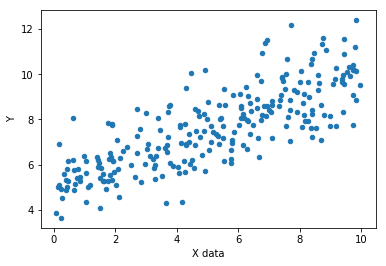

In [96]:
my_sample = my_data.sample(n=250).plot(kind='scatter',x='X data',y='Y')